In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import time
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.layers import Conv1D, Flatten,MaxPooling1D
from keras.preprocessing import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import auc

In [ ]:
#Read from Cleaned CSV
CleanedData= pd.read_csv('/content/Cleaned_Youtube.csv',index_col=0)
#See cleaned Data
CleanedData.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Language,label,lem,token_title,No Punc Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,English,1,"['we', 'want', 'to', 'talk', 'about', 'our', '...","['we', 'want', 'to', 'talk', 'about', 'our', '...",we want to talk about our marriage
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",English,1,"['the', 'trump', 'presidency', 'last', 'week',...","['the', 'trump', 'presidency', 'last', 'week',...",the trump presidency last week tonight with jo...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,English,1,"['racist', 'superman', '|', 'rudy', 'mancuso',...","['racist', 'superman', '|', 'rudy', 'mancuso',...",racist superman | rudy mancuso king bach lele...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,English,0,"['nickelback', 'lyric', 'real', 'or', 'fake']","['nickelback', 'lyrics', 'real', 'or', 'fake']",nickelback lyrics real or fake
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,...,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,English,0,"['2', 'week', 'with', 'iphone', 'x']","['2', 'weeks', 'with', 'iphone', 'x']",2 weeks with iphone x


In [ ]:
#Read from Cleaned data , resetting index
CleanedData.reset_index(drop = True, inplace = True)
CleanedData.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Language,label,lem,token_title,No Punc Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,English,1,"['we', 'want', 'to', 'talk', 'about', 'our', '...","['we', 'want', 'to', 'talk', 'about', 'our', '...",we want to talk about our marriage
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",English,1,"['the', 'trump', 'presidency', 'last', 'week',...","['the', 'trump', 'presidency', 'last', 'week',...",the trump presidency last week tonight with jo...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,English,1,"['racist', 'superman', '|', 'rudy', 'mancuso',...","['racist', 'superman', '|', 'rudy', 'mancuso',...",racist superman | rudy mancuso king bach lele...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,English,0,"['nickelback', 'lyric', 'real', 'or', 'fake']","['nickelback', 'lyrics', 'real', 'or', 'fake']",nickelback lyrics real or fake
4,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,...,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,English,0,"['2', 'week', 'with', 'iphone', 'x']","['2', 'weeks', 'with', 'iphone', 'x']",2 weeks with iphone x


In [ ]:
corpus = [CleanedData['No Punc Title'][i] for i in range( len(CleanedData))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length = 20

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
embedding_vector_features=40

X_final=np.array(embedded_docs)
y_final=np.array(CleanedData['label'])


#Train Test Split 
# X - > No punctuation column
# Y - > label
# 80/20 split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_final, y_final, test_size=0.2, random_state=10)

In [ ]:
lstm_model=Sequential()
lstm_model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(100)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Flatten())
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                      

In [ ]:
lstm_model.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=2,batch_size=64)

Epoch 1/2
803/803 [==============================] - 44s 50ms/step - loss: 0.5465 - accuracy: 0.7190 - val_loss: 0.4561 - val_accuracy: 0.7889
Epoch 2/2
803/803 [==============================] - 40s 50ms/step - loss: 0.4189 - accuracy: 0.8163 - val_loss: 0.4294 - val_accuracy: 0.8153


In [ ]:
y_test_pred=lstm_model.predict(X_test_lstm)
y_train_pred=lstm_model.predict(X_train_lstm)

y_test_pred=(y_test_pred>0.5)
test_acc_lstm = accuracy_score(y_test_lstm,y_test_pred)
print("next Test ACC", test_acc_lstm)
y_train_pred=(y_train_pred>0.5)
train_acc_lstm = accuracy_score(y_train_lstm,y_train_pred)
print("Train ACC", train_acc_lstm)

next Test ACC 0.8152791838641851
Train ACC 0.8590063079199439


In [ ]:
# Metrics
print("Accuracy ",metrics.accuracy_score(y_test_lstm,y_test_pred)*100)
print("F1 Score ",metrics.f1_score(y_test_lstm,y_test_pred)*100)

Accuracy  81.5279183864185
F1 Score  83.60746371803732


Text(91.68, 0.5, 'predicted label')

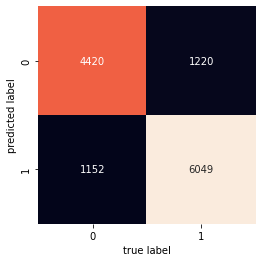

In [ ]:
#Confustion Matrix heat map
mat = confusion_matrix(y_test_lstm,y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label')